In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [550]:
 # read the data
df = pd.read_csv("heart.csv")

In [551]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [552]:
# Replace string values into integers
# In integer values
# where ATA (Atypical Angina) = 0
# NAP (Non-Anginal Pain) = 1
# ASY (Asymptomatic) = 2
# TA (Typical Angina) = 3
df = df.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})

# Replace string values into integers
# In integer values where 
# Up = 0, Flat = 1 and Down = 2
df = df.replace({'Up': 0, 'Flat': 1, 'Down': 2})

# Replace string values into integers
# In integer values where
# Normal = 0, ST (having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
# and LVH(showing probable or definite left ventricular hypertrophy by Estes’ criteria) = 2
df = df.replace({'Normal': 0, 'ST': 1, 'LVH': 2})

C:\Users\vilil\AppData\Local\Temp\ipykernel_4368\1749458802.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
C:\Users\vilil\AppData\Local\Temp\ipykernel_4368\1749458802.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Up': 0, 'Flat': 1, 'Down': 2})
C:\Users\vilil\AppData\Local\Temp\ipykernel_4368\1749458802.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explic

In [553]:
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to turn columns 'Sex' and 'ExerciseAngina' into
# numerical format where in 'Sex' 0 resembles male and
# 1 resembles female
# in 'ExerciseAngina' 0 equals to no exercise-induced angina
# and 1 equals to exercise-induced angina
variables = ['Sex', 'ExerciseAngina']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [554]:
# check for duplicates
df.duplicated().sum()

0

In [555]:
# check for missing values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [556]:
from scipy import stats

# Remove the furthest outliers that lie outside of
# - 3 and +3 out of standard deviation
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [557]:
# Drop column 'Training LevelTraining Level' from dataset
# and add it to y variable to become the target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [558]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,0,132,0,1.2,1,1
914,68,1,2,144,193,1,0,141,0,3.4,1,1
915,57,1,2,130,131,0,0,115,1,1.2,1,1
916,57,0,0,130,236,0,2,174,0,0.0,1,1


In [559]:
 
# displaying the datatypes
#display(df.dtypes)
 
# converting all columns from float to int
#df = df.astype({"Symbol": 'int', "Open": 'int', "High": 'int',"Low": 'int',"Volume": 'int',"Close": 'int'})
# 'Open', 'High', 'Low', 'Volume'
 
# displaying the datatypes
#display(df.dtypes)

In [560]:
 # pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression)
# however, this information can be misleading too so remember to be careful before deleting any data!
vif_data

,feature,VIF
0,Age,33.880150
1,Sex,5.034018
2,ChestPainType,4.809605
3,RestingBP,51.199569
4,Cholesterol,5.377763
5,FastingBS,1.488158
6,RestingECG,1.659223
7,MaxHR,22.714977
8,ExerciseAngina,2.493581
9,Oldpeak,2.531607


In [561]:
df = df.drop('RestingBP', axis=1)
df = df.drop('MaxHR', axis=1)
df = df.drop('Age', axis=1)

In [562]:
# create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [563]:
# initialize the scaler and process X-values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [564]:
# Change X_train variable from float to integer
#X_train.astype('int64')

In [565]:
# Change y_train variable from float to integer
#y_train.astype('int64')

In [566]:
# import pipeline and different optimization methods
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer


#logmodel = make_pipeline(LogisticRegression(solver="newton-cholesky")) # roc_auc = 68.67 %
#logmodel.fit(X_train, y_train)

 
logmodel = make_pipeline(StandardScaler(), LogisticRegression(solver="lbfgs")) #roc_auc = 65 %
logmodel.fit(X_train, y_train)

# 

# pipeline allows us to chain multiple features of scikit-learn
# this is also a nice way to handle scaling without the hassle in linear regression
#logmodel = make_pipeline(StandardScaler(), PolynomialFeatures(degree=5, include_bias=True), LogisticRegression(solver="newton-cholesky"))
#logmodel.fit(X_train, y_train)  # roc_auc = 88 %


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [567]:
df

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,0,289,0,0,0,0.0,0,0
1,0,1,180,0,0,0,1.0,1,1
2,1,0,283,0,1,0,0.0,0,0
3,0,2,214,0,0,1,1.5,1,1
4,1,1,195,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
913,1,3,264,0,0,0,1.2,1,1
914,1,2,193,1,0,0,3.4,1,1
915,1,2,131,0,0,1,1.2,1,1
916,0,0,236,0,2,0,0.0,1,1


In [568]:
# create test predictions
predictions = logmodel.predict(X_test)

df = df.replace({'0': 'No', '1': 'Yes'})

# our labels for the species in iris dataset
labels = 'No', 'Yes'

# use labels-list to have better classification anmes
print(classification_report(y_test, predictions, target_names=labels))
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

          No       0.83      0.82      0.82       115
         Yes       0.87      0.88      0.87       155

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270


Model overall accuracy: 85.19%


[[ 94  21]
 [ 19 136]]




<Axes: >

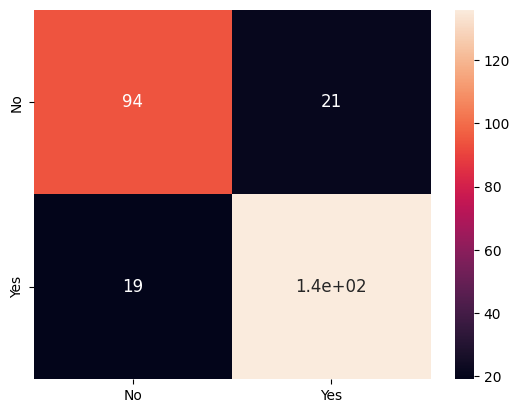

In [569]:
# Basic confusion matrix
print(confusion_matrix(y_test, predictions))
print("\n")

# use seaborn to make a nicer confusion matrix
cm_array = confusion_matrix(y_test, predictions)
cm_array_df = pd.DataFrame(cm_array, index=labels, columns=labels)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}) 

In [570]:
# Calculate how accurate the prediction is
#roc_auc_score(y, logmodel.predict_proba(X), multi_class='ovr')

roc_auc_score(y, logmodel.predict_proba(X.values)[:, 1])

0.6692784802540901

<Axes: >

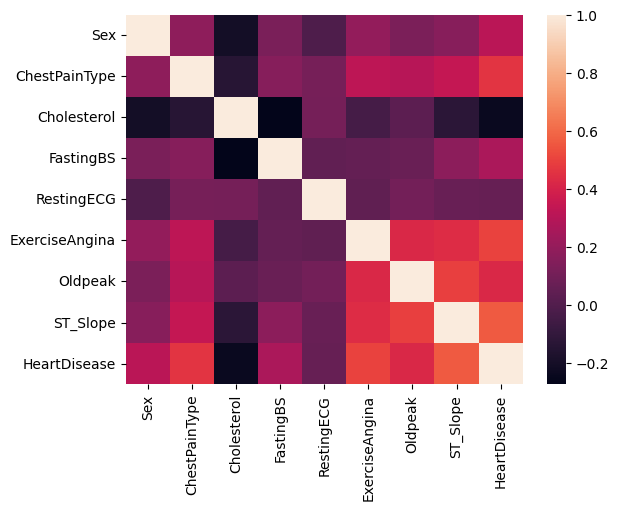

In [571]:
sns.heatmap(df.corr())

In [572]:
df.describe()

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,0.789766,1.447164,198.005562,0.232481,0.598443,0.403782,0.861513,0.626251,0.547275
std,0.407701,0.853553,107.157779,0.422649,0.803693,0.490928,1.007626,0.601057,0.498037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000
25%,1.000000,1.000000,174.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,222.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000
75%,1.000000,2.000000,266.000000,0.000000,1.000000,1.000000,1.500000,1.000000,1.000000
max,1.000000,3.000000,518.000000,1.000000,2.000000,1.000000,4.000000,2.000000,1.000000


In [573]:
df

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,0,289,0,0,0,0.0,0,0
1,0,1,180,0,0,0,1.0,1,1
2,1,0,283,0,1,0,0.0,0,0
3,0,2,214,0,0,1,1.5,1,1
4,1,1,195,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
913,1,3,264,0,0,0,1.2,1,1
914,1,2,193,1,0,0,3.4,1,1
915,1,2,131,0,0,1,1.2,1,1
916,0,0,236,0,2,0,0.0,1,1


In [574]:
tester_row = {
    'Open': 700,
    'High': 600,
    'Low': 300,
    'Close': 500,
    'Volume': 15,
    'Day': 15,
    'Month': 10,
    'Year': 2001,
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])

print("All probabilities by category:")
print(logmodel.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Was in question comodity sold with tested value (Yes/No):")
result = labels[logmodel.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:


c:\USERS\VILIL\DESKTOP\MACHINE_LEARNING_2024_NEWEST\MACHINE_LEARNING_2024\.VENV\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 8 features, but StandardScaler is expecting 11 features as input.